In [61]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

In [14]:
with open("./sdt2sdf_default/1_16_patient009.pkl", "rb") as input_file:
    result = pickle.load(input_file)

    version_ = result["version"]
    repr_ = result["repr"]
    trainable_task_ = result["trainable_task"]
    history_loss_ = result["history_loss"]
    params_ = result["params"]

min(history_loss_)

0.000643695006147027

In [15]:
min_loss = np.zeros((6, 7))

for i, width in enumerate([2, 4, 8, 16, 32, 64]):
    for j, depth in enumerate([1, 2, 4, 8, 16, 32, 64]):
        with open(
            f"./sdt2sdf_default/{depth}_{width}_patient009.pkl", "rb"
        ) as input_file:
            result = pickle.load(input_file)
            history_loss_ = result["history_loss"]
            min_loss[i, j] = min(history_loss_)

In [16]:
min_loss

array([[1.68422237e-02, 1.19281653e-02, 1.18867159e-02, 1.19251879e-02,
        1.13370223e-02, 2.50279941e-02, 3.39141302e-02],
       [7.54742557e-03, 2.72017810e-03, 1.43226376e-03, 8.04384996e-04,
        6.14021963e-04, 9.72082024e-04, 3.01294569e-02],
       [3.79130570e-03, 9.00919200e-04, 4.24452184e-04, 1.99641363e-04,
        1.64864934e-04, 2.18206944e-04, 3.13337296e-02],
       [1.78049388e-03, 6.43695006e-04, 2.49297824e-04, 1.19389450e-04,
        9.56886724e-05, 1.14701812e-04, 3.39141302e-02],
       [1.20742712e-03, 4.40577336e-04, 1.19751159e-04, 7.66820594e-05,
        8.93688994e-05, 3.06392810e-03, 3.08033451e-02],
       [9.25996224e-04, 3.35531658e-04, 8.45148679e-05, 6.27432455e-05,
        8.52434750e-05, 2.78693214e-02, 3.01696472e-02]])

<AxesSubplot: >

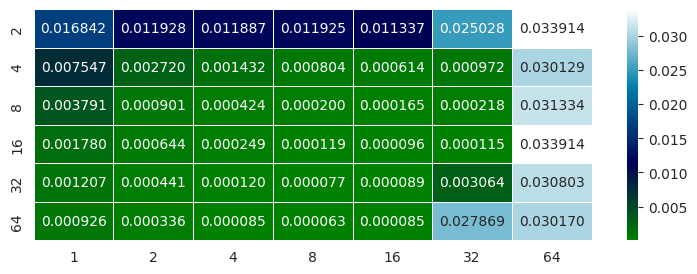

In [37]:
f, ax = plt.subplots(figsize=(9, 3))
sns.heatmap(
    min_loss,
    annot=True,
    fmt=".06f",
    linewidths=0.5,
    ax=ax,
    cmap="ocean",
    xticklabels=[1, 2, 4, 8, 16, 32, 64],
    yticklabels=[2, 4, 8, 16, 32, 64],
)

Text(63.25, 0.5, 'width')

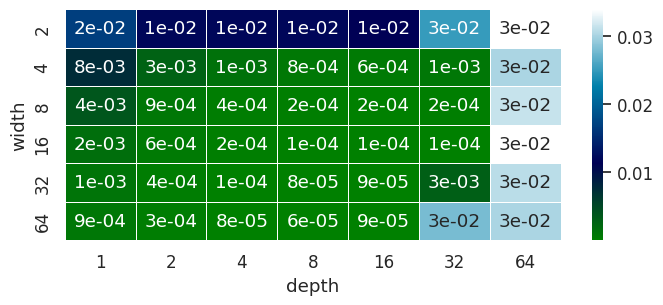

In [47]:
sns.set(font_scale=1.1)
f, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(
    min_loss,
    annot=True,
    fmt=".00e",
    linewidths=0.5,
    ax=ax,
    cmap="ocean",
    xticklabels=[1, 2, 4, 8, 16, 32, 64],
    yticklabels=[2, 4, 8, 16, 32, 64],
)
plt.xlabel("depth")
plt.ylabel("width")

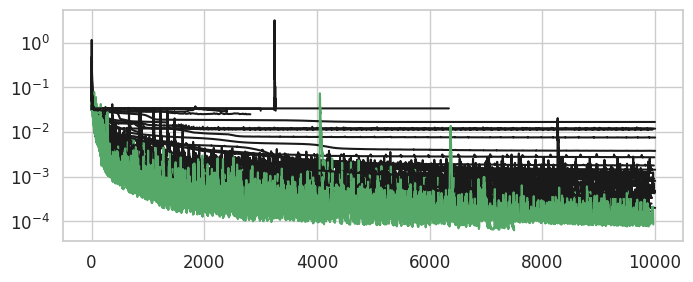

In [75]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(8, 3))

for i, width in enumerate([2, 4, 8, 16, 32, 64]):
    for j, depth in enumerate([1, 2, 4, 8, 16, 32, 64]):
        with open(
            f"./sdt2sdf_default/{depth}_{width}_patient009.pkl", "rb"
        ) as input_file:
            result = pickle.load(input_file)
            history_loss_ = result["history_loss"]
            if min(history_loss_) < 10e-05:
                plt.semilogy(history_loss_, color="g")
            else:
                plt.semilogy(history_loss_, color="k")